In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
sns.set_style('whitegrid')

## Q1

In [2]:
df1 = pd.DataFrame([[25, 'sports', 'L'], [20, 'vintage', 'H'], [25, 'sports', 'L'],
                   [45, 'suv', 'H'], [20, 'sports', 'H'], [25, 'suv', 'H']], columns=['Age', 'Car', 'Risk'])
df1

,Age,Car,Risk
0,25,sports,L
1,20,vintage,H
2,25,sports,L
3,45,suv,H
4,20,sports,H
5,25,suv,H


In [3]:
name = ['Car', 'Risk']

for i in name:
    le = LabelEncoder()
    le = le.fit(df1[i])
    df1[i] = le.transform(df1[i])
df1

,Age,Car,Risk
0,25,0,1
1,20,2,0
2,25,0,1
3,45,1,0
4,20,0,0
5,25,1,0


In [4]:
from sklearn import tree

X1 = np.array(df1[['Age', 'Car']])
y1 = np.array(df1['Risk'])

clf1 = tree.DecisionTreeClassifier(criterion='entropy', random_state=42)
clf1.fit(X1, y1)
clf1.predict([[27, 2]])

array([0])

In [5]:
import graphviz
import pydotplus as pdp
from sklearn.externals.six import StringIO

dot_data1 = StringIO()
tree.export_graphviz(clf1, out_file=dot_data1, feature_names=df1.columns[0:2], class_names=['H', 'L'], filled=True, rounded=True)
graph = pdp.graph_from_dot_data(dot_data1.getvalue())

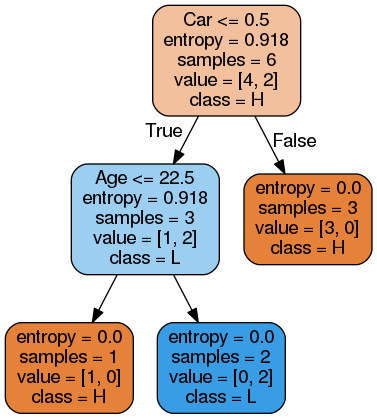

In [6]:
from IPython.display import Image
Image(graph.create_png())

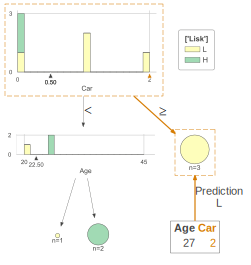

In [7]:
from dtreeviz.trees import *

viz = dtreeviz(
    clf1, X1, y1, target_name=['Lisk'],
    feature_names=df1.columns[0:2], class_names=['L', 'H'], X=[27, 2])
viz

## Q2

In [8]:
df2 = pd.DataFrame([['T', 'T', 5.0, 'Y'], ['T', 'T', 7.0, 'Y'], ['T', 'F', 8.0, 'N'], ['F', 'F', 3.0, 'Y'], ['F', 'T', 7.0, 'N'], 
                   ['F', 'T', 4.0, 'N'], ['F', 'F', 5.0, 'N'], ['T', 'F', 6.0, 'Y'], ['F', 'T', 1.0, 'N']],
                  columns=['a1', 'a2', 'a3', 'Class'])
df2

,a1,a2,a3,Class
0,T,T,5.0,Y
1,T,T,7.0,Y
2,T,F,8.0,N
3,F,F,3.0,Y
4,F,T,7.0,N
5,F,T,4.0,N
6,F,F,5.0,N
7,T,F,6.0,Y
8,F,T,1.0,N


In [9]:
name = ['a1', 'a2', 'Class']

for i in name:
    le = LabelEncoder()
    le = le.fit(df2[i])
    df2[i] = le.transform(df2[i])
df2

,a1,a2,a3,Class
0,1,1,5.0,1
1,1,1,7.0,1
2,1,0,8.0,0
3,0,0,3.0,1
4,0,1,7.0,0
5,0,1,4.0,0
6,0,0,5.0,0
7,1,0,6.0,1
8,0,1,1.0,0


In [10]:
X2 = np.array(df2[['a1', 'a2', 'a3']])
y2 = np.array(df2['Class'])

In [11]:
# criterion='entropy'
clf_en = tree.DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_en.fit(X2, y2)

# plot
dot_data_en = StringIO()
tree.export_graphviz(clf_en, out_file=dot_data_en, feature_names=df2.columns[0:3], class_names=['N', 'Y'], filled=True, rounded=True)
graph_en = pdp.graph_from_dot_data(dot_data_en.getvalue())

viz_en = dtreeviz(
    clf_en, X2, y2, target_name=['Class'],
    feature_names=df2.columns[0:3], class_names=['N', 'Y']
)

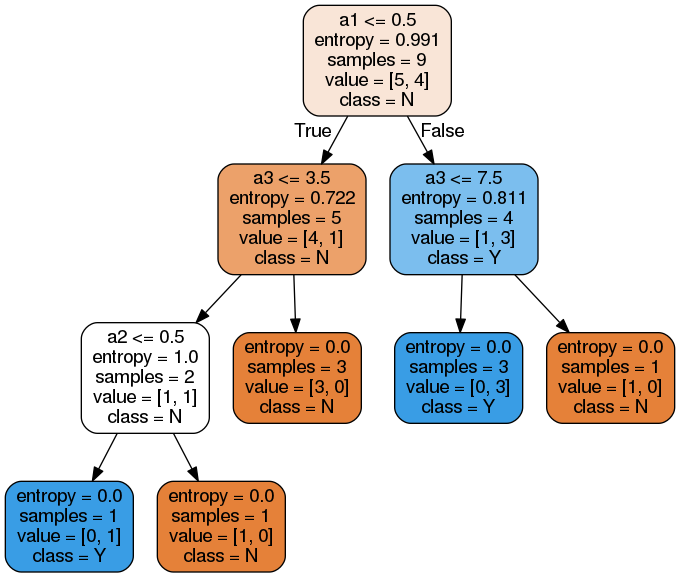

In [12]:
Image(graph_en.create_png())

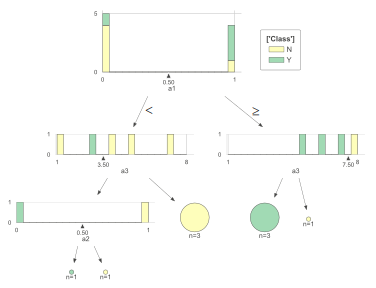

In [13]:
viz_en

In [14]:
# criterion='gini'
clf_gi = tree.DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gi.fit(X2, y2)

# plot
dot_data_gi = StringIO()
tree.export_graphviz(clf_gi, out_file=dot_data_gi, feature_names=df2.columns[0:3], class_names=['N', 'Y'], filled=True, rounded=True)
graph_gi = pdp.graph_from_dot_data(dot_data_gi.getvalue())

viz_gi = dtreeviz(
    clf_gi, X2, y2, target_name=['Class'],
    feature_names=df2.columns[0:3], class_names=['N', 'Y']
)

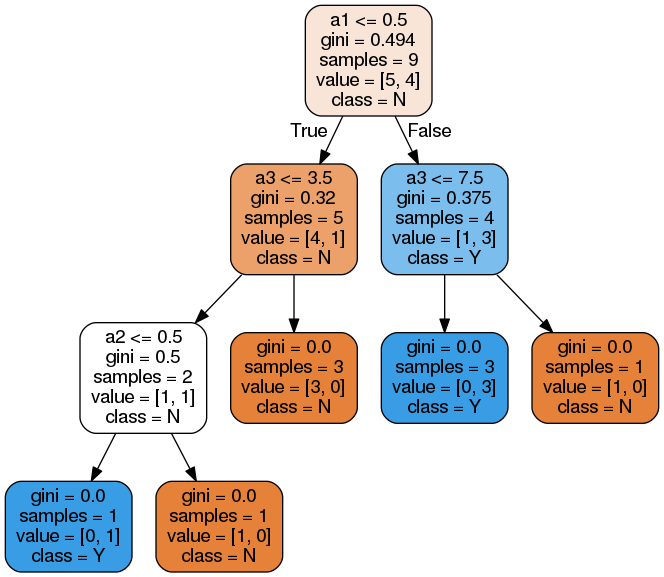

In [15]:
Image(graph_gi.create_png())

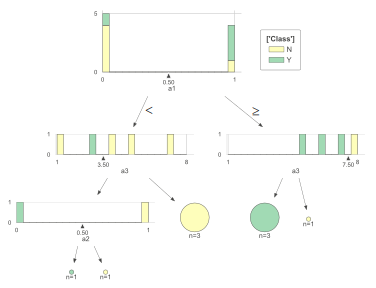

In [16]:
viz_gi